# Analyse des articles sur le COVID-19

Dans ce défi, nous allons poursuivre sur le thème de la pandémie de COVID et nous concentrer sur le traitement des articles scientifiques sur le sujet. Il existe un [jeu de données CORD-19](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) contenant plus de 7000 articles (au moment de la rédaction) sur le COVID, disponibles avec des métadonnées et des résumés (et pour environ la moitié d'entre eux, le texte intégral est également fourni).

Un exemple complet d'analyse de ce jeu de données en utilisant le service cognitif [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) est décrit [dans cet article de blog](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/). Nous discuterons d'une version simplifiée de cette analyse.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obtention des données

Tout d'abord, nous devons récupérer les métadonnées des articles CORD avec lesquels nous allons travailler.

**REMARQUE** : Nous ne fournissons pas une copie du jeu de données dans ce dépôt. Vous devrez d'abord télécharger le fichier [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) depuis [ce jeu de données sur Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge). Une inscription sur Kaggle peut être nécessaire. Vous pouvez également télécharger le jeu de données sans inscription [à partir d'ici](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html), mais cela inclura tous les textes complets en plus du fichier de métadonnées.

Nous allons essayer d'obtenir les données directement depuis une source en ligne. Cependant, si cela échoue, vous devrez télécharger les données comme décrit ci-dessus. De plus, il est judicieux de télécharger les données si vous prévoyez de les utiliser davantage, afin de réduire le temps d'attente.

> **REMARQUE** : Le jeu de données est assez volumineux, environ 1 Go, et la ligne de code suivante peut prendre beaucoup de temps à s'exécuter ! (~5 minutes)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

Nous allons maintenant convertir la colonne de date de publication en `datetime`, et tracer l'histogramme pour voir l'étendue des dates de publication.


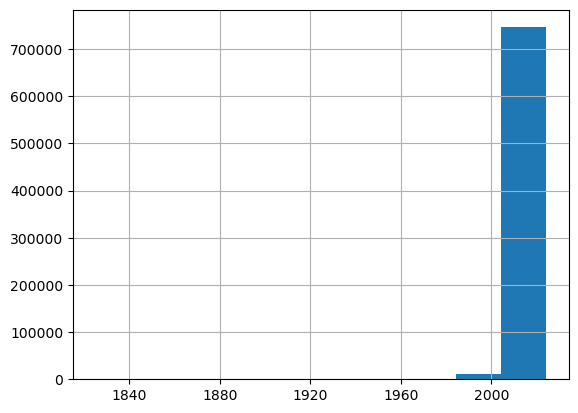

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## Extraction de données structurées

Voyons quel type d'informations nous pouvons facilement extraire des résumés. Une chose qui pourrait nous intéresser est d'examiner quelles stratégies de traitement existent et comment elles ont évolué au fil du temps. Pour commencer, nous pouvons compiler manuellement la liste des médicaments possibles utilisés pour traiter le COVID, ainsi que la liste des diagnostics. Ensuite, nous les parcourons et recherchons les termes correspondants dans les résumés des articles.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


Nous avons ajouté plusieurs colonnes à notre dataframe qui contiennent le nombre de fois qu'un médicament ou un diagnostic donné est présent dans le résumé.

> **Note** que nous ajoutons un espace au début du mot lors de la recherche d'une sous-chaîne. Si nous ne le faisons pas, nous risquons d'obtenir des résultats incorrects, car *chloroquine* serait également trouvé à l'intérieur de la sous-chaîne *hydroxychloroquine*. De plus, nous forçons la conversion de la colonne des résumés en `str` pour éviter une erreur - essayez de supprimer `str` et voyez ce qui se passe.

Pour faciliter le travail avec les données, nous pouvons extraire la sous-trame contenant uniquement les décomptes de médicaments et calculer le nombre total d'occurrences. Cela nous donne le médicament le plus populaire :


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

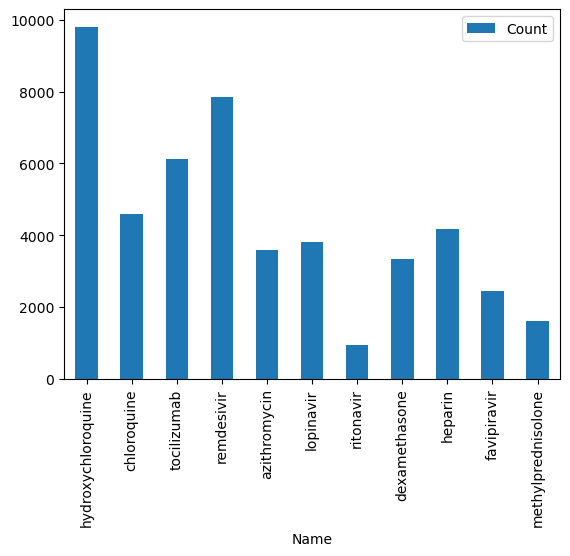

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## Recherche de tendances dans les stratégies de traitement

Dans l'exemple ci-dessus, nous avons effectué la `somme` de toutes les valeurs, mais nous pouvons également le faire sur une base mensuelle :


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

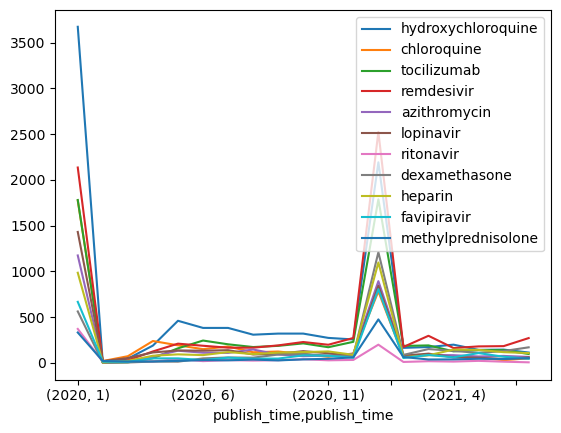

In [152]:
dfmt.plot()
plt.show()

Une observation intéressante est que nous avons de grandes pointes à deux endroits : janvier 2020 et janvier 2021. Cela est dû au fait que certains articles n'ont pas de date de publication clairement spécifiée, et ils sont donc indiqués comme janvier de l'année correspondante.

Pour mieux interpréter les données, visualisons seulement quelques médicaments. Nous allons également "effacer" les données pour le mois de janvier et les remplacer par une valeur moyenne, afin d'obtenir un graphique plus esthétique :


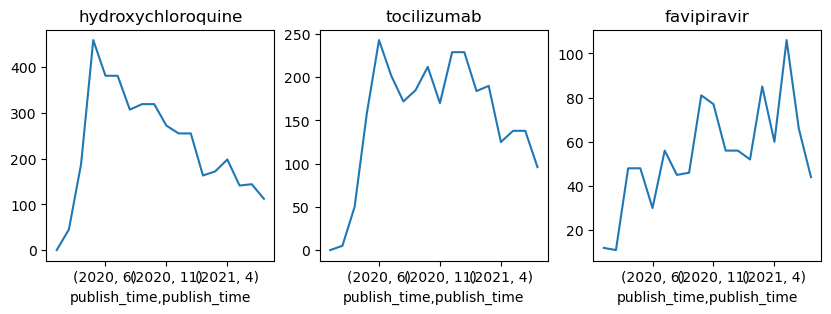

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

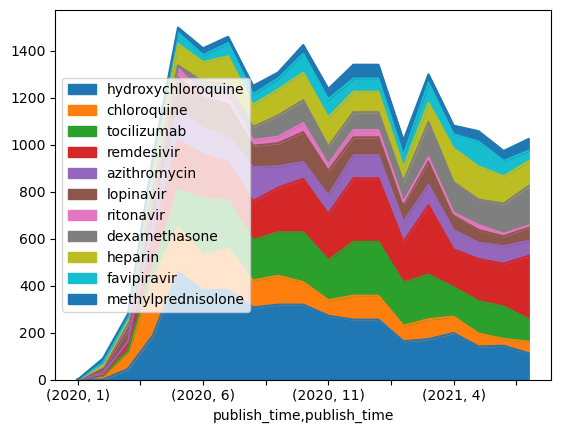

In [154]:
dfmt.plot.area()
plt.show()

Encore plus loin, nous pouvons calculer la popularité relative en pourcentages :


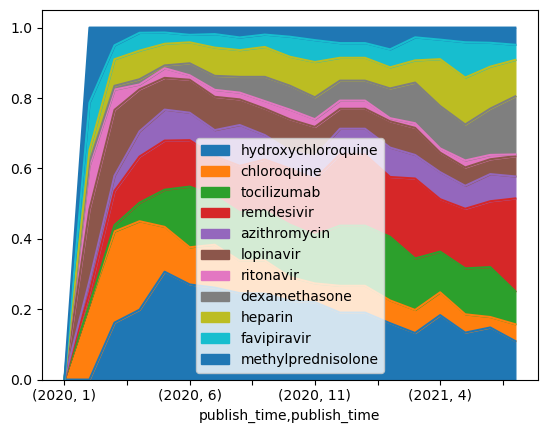

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## Correspondance entre médicaments et diagnostics

L'une des relations les plus intéressantes à explorer est la manière dont différents diagnostics sont traités avec différents médicaments. Pour visualiser cela, nous devons calculer une **carte de fréquence de co-occurrence**, qui montrera combien de fois deux termes sont mentionnés dans le même article.

Une telle carte est essentiellement une matrice 2D, qui est mieux représentée par un **tableau numpy**. Nous allons calculer cette carte en parcourant tous les résumés et en identifiant les entités qui y apparaissent :


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

Une des façons de visualiser cette matrice est de dessiner une **carte thermique** :


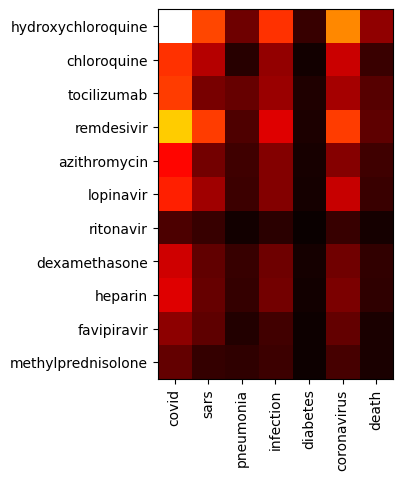

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

Cependant, une visualisation encore meilleure peut être réalisée en utilisant ce qu'on appelle un diagramme **Sankey** ! `matplotlib` n'a pas de support intégré pour ce type de diagramme, nous devrons donc utiliser [Plotly](https://plotly.com/python/) comme décrit [dans ce tutoriel](https://plotly.com/python/sankey-diagram/).

Pour créer un diagramme Sankey avec Plotly, nous devons construire les listes suivantes :
* Une liste `all_nodes` contenant tous les nœuds du graphe, qui inclura à la fois les médicaments et les diagnostics
* Une liste des indices source et cible - ces listes indiqueront quels nœuds vont vers la partie gauche et quels vont vers la partie droite du diagramme
* Une liste de tous les liens, chaque lien comprenant :
   - L'indice source dans le tableau `all_nodes`
   - L'indice cible
   - Une valeur indiquant la force du lien. C'est exactement la valeur de notre matrice de co-occurrence.
   - Optionnellement, la couleur du lien. Nous ajouterons une option pour mettre en évidence certains termes afin de clarifier le diagramme.

Le code générique pour dessiner un diagramme Sankey est structuré sous forme d'une fonction distincte `sankey`, qui prend deux listes (catégories source et cible) et une matrice de co-occurrence. Elle permet également de spécifier un seuil et d'omettre tous les liens qui sont plus faibles que ce seuil - cela rend le diagramme un peu moins complexe.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## Conclusion

Vous avez vu qu'il est possible d'utiliser des méthodes assez simples pour extraire des informations à partir de sources de données non structurées, comme du texte. Dans cet exemple, nous avons utilisé une liste existante de médicaments, mais il serait bien plus puissant d'employer des techniques de traitement du langage naturel (NLP) pour effectuer l'extraction d'entités à partir de texte. Dans [cet article de blog](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/), nous expliquons comment utiliser des services cloud pour l'extraction d'entités. Une autre option serait d'utiliser des bibliothèques NLP en Python, comme [NLTK](https://www.nltk.org/) - une approche pour extraire des informations à partir de texte avec NLTK est décrite [ici](https://www.nltk.org/book/ch07.html).


## Défi

Poursuivez l'analyse des données des articles sur le COVID selon les axes suivants :

1. Construisez une matrice de co-occurrence des différents médicaments et identifiez ceux qui sont souvent mentionnés ensemble (c'est-à-dire dans un même résumé). Vous pouvez modifier le code pour construire une matrice de co-occurrence pour les médicaments et les diagnostics.
1. Visualisez cette matrice à l'aide d'une carte thermique (heatmap).
1. Pour aller plus loin, vous pouvez visualiser la co-occurrence des médicaments en utilisant un [diagramme en cordes](https://en.wikipedia.org/wiki/Chord_diagram). [Cette bibliothèque](https://pypi.org/project/chord/) pourrait vous aider à créer un diagramme en cordes.
1. Pour un autre objectif avancé, essayez d'extraire les dosages des différents médicaments (comme **400mg** dans *prendre 400mg de chloroquine par jour*) en utilisant des expressions régulières, et construisez un dataframe qui montre les différents dosages pour chaque médicament. **Note** : prenez en compte les valeurs numériques qui se trouvent à proximité immédiate du nom du médicament dans le texte.



---

**Avertissement** :  
Ce document a été traduit à l'aide du service de traduction automatique [Co-op Translator](https://github.com/Azure/co-op-translator). Bien que nous nous efforcions d'assurer l'exactitude, veuillez noter que les traductions automatisées peuvent contenir des erreurs ou des inexactitudes. Le document original dans sa langue d'origine doit être considéré comme la source faisant autorité. Pour des informations critiques, il est recommandé de recourir à une traduction professionnelle effectuée par un humain. Nous déclinons toute responsabilité en cas de malentendus ou d'interprétations erronées résultant de l'utilisation de cette traduction.
